In [150]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1


In [151]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from ydata_profiling import ProfileReport


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression



0.9495384615384616
1.0
1.0


In [152]:
df = pd.read_csv(os.path.join(path, "StudentsPerformance.csv"))

In [153]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [154]:
encoder = LabelEncoder()

df["gender"] = encoder.fit_transform(df["gender"])
df["race/ethnicity"] = encoder.fit_transform(df["race/ethnicity"])
df["parental level of education"] = encoder.fit_transform(
    df["parental level of education"]
)
df["lunch"] = encoder.fit_transform(df["lunch"])
df["test preparation course"] = encoder.fit_transform(df["test preparation course"])

In [155]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [156]:
# profile = ProfileReport(df)
# profile.to_notebook_iframe()

<Axes: >

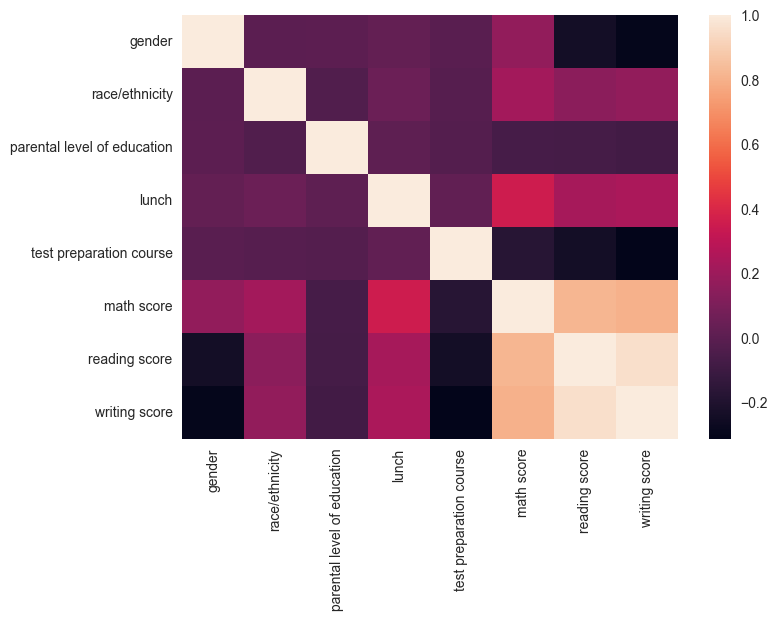

In [157]:
corr = df.corr()
sns.heatmap(corr)

In [158]:
df = df.drop(
    [
        "gender",
        "race/ethnicity",
        "parental level of education",
        "lunch",
        "test preparation course",
    ],
    axis=1,
)

In [159]:
scaler = StandardScaler()
scalded_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [160]:
X = scalded_df

In [161]:
X_math = X[["reading score", "writing score"]]
X_reading = X[["math score", "writing score"]]
X_writing = X[["math score", "reading score"]]

y_math = X["math score"]
y_reading = X["reading score"]
y_writing = X["writing score"]

In [162]:
X_math_train, X_math_test, y_math_train, y_math_test = train_test_split(
    X_math, y_math, train_size=0.7, shuffle=True
)

X_reading_train, X_reading_test, y_reading_train, y_reading_test = train_test_split(
    X_reading, y_reading, train_size=0.7, shuffle=True
)

X_writing_train, X_writing_test, y_writing_train, y_writing_test = train_test_split(
    X_writing, y_writing, train_size=0.7, shuffle=True
)

math_model = LinearRegression()
math_model.fit(X_math_train, y_math_train)

reading_model = LinearRegression()
reading_model.fit(X_reading_train, y_reading_train)

writing_model = LinearRegression()
writing_model.fit(X_writing_train, y_writing_train)

# Evaluate models
math_score = math_model.score(X_math_test, y_math_test)
reading_score = reading_model.score(X_reading_test, y_reading_test)
writing_score = writing_model.score(X_writing_test, y_writing_test)

print(f"Math model R-squared: {math_score:.4f}")
print(f"Reading model R-squared: {reading_score:.4f}")
print(f"Writing model R-squared: {writing_score:.4f}")

Math model R-squared: 0.6718
Reading model R-squared: 0.9209
Writing model R-squared: 0.9119


In [163]:
from pycaret.regression import *


setup(X, target=X["math score"], train_size=0.7, session_id=42)

,Description,Value
0,Session id,42
1,Target,math score_y
2,Target type,Regression
3,Original data shape,"(1000, 4)"
4,Transformed data shape,"(1000, 4)"
5,Transformed train set shape,"(700, 4)"
6,Transformed test set shape,"(300, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [164]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0040
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0030
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0040
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0060
ridge,Ridge Regression,0.0023,0.0000,0.0028,1.0000,0.0017,0.0126,0.0040
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0040
et,Extra Trees Regressor,0.0043,0.0008,0.0185,0.9992,0.0057,0.0076,0.0140
gbr,Gradient Boosting Regressor,0.0029,0.0009,0.0181,0.9991,0.0046,0.0017,0.0120
catboost,CatBoost Regressor,0.0117,0.0012,0.0290,0.9988,0.0100,0.0424,0.0540
rf,Random Forest Regressor,0.0045,0.0012,0.0242,0.9988,0.0063,0.0019,0.0200


LinearRegression(n_jobs=-1)

In [165]:
setup(X, target=X["reading score"], train_size=0.7, session_id=42)

,Description,Value
0,Session id,42
1,Target,reading score_y
2,Target type,Regression
3,Original data shape,"(1000, 4)"
4,Transformed data shape,"(1000, 4)"
5,Transformed train set shape,"(700, 4)"
6,Transformed test set shape,"(300, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [166]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0090
ridge,Ridge Regression,0.0044,0.0000,0.0055,1.0000,0.0035,0.0164,0.0040
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0040
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0040
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0040
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0060
et,Extra Trees Regressor,0.0039,0.0005,0.0142,0.9995,0.0053,0.0067,0.0150
gbr,Gradient Boosting Regressor,0.0019,0.0005,0.0118,0.9995,0.0035,0.0037,0.0090
dt,Decision Tree Regressor,0.0023,0.0006,0.0161,0.9994,0.0049,0.0010,0.0040
rf,Random Forest Regressor,0.0033,0.0007,0.0165,0.9993,0.0050,0.0016,0.0180


LinearRegression(n_jobs=-1)

In [167]:
setup(X, target=X["writing score"], train_size=0.7, session_id=42)

,Description,Value
0,Session id,42
1,Target,writing score_y
2,Target type,Regression
3,Original data shape,"(1000, 4)"
4,Transformed data shape,"(1000, 4)"
5,Transformed train set shape,"(700, 4)"
6,Transformed test set shape,"(300, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [168]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0040
ridge,Ridge Regression,0.0043,0.0000,0.0053,1.0000,0.0034,0.0461,0.0030
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0030
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0040
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0040
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0040
gbr,Gradient Boosting Regressor,0.0014,0.0002,0.0091,0.9998,0.0027,0.0012,0.0100
et,Extra Trees Regressor,0.0034,0.0002,0.0119,0.9997,0.0051,0.0131,0.0140
rf,Random Forest Regressor,0.0022,0.0003,0.0119,0.9997,0.0035,0.0013,0.0190
dt,Decision Tree Regressor,0.0023,0.0005,0.0162,0.9994,0.0049,0.0010,0.0040


LinearRegression(n_jobs=-1)